# __Indicators__
1. Trend Indicators
   * SMA (Simple Moving Average)
   * ADX (Average Directional Index) - Determine the strength of a trend (0-20) shows weak trend . (40-60) shows strong trend...
     A strong uptrend is indicated when +DI is above -DI, while a strong downtrend is indicated when -DI is above +DI.
   * EMA (Exponential Moving Average) - place greater emphasis on recent data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]
prices

[100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

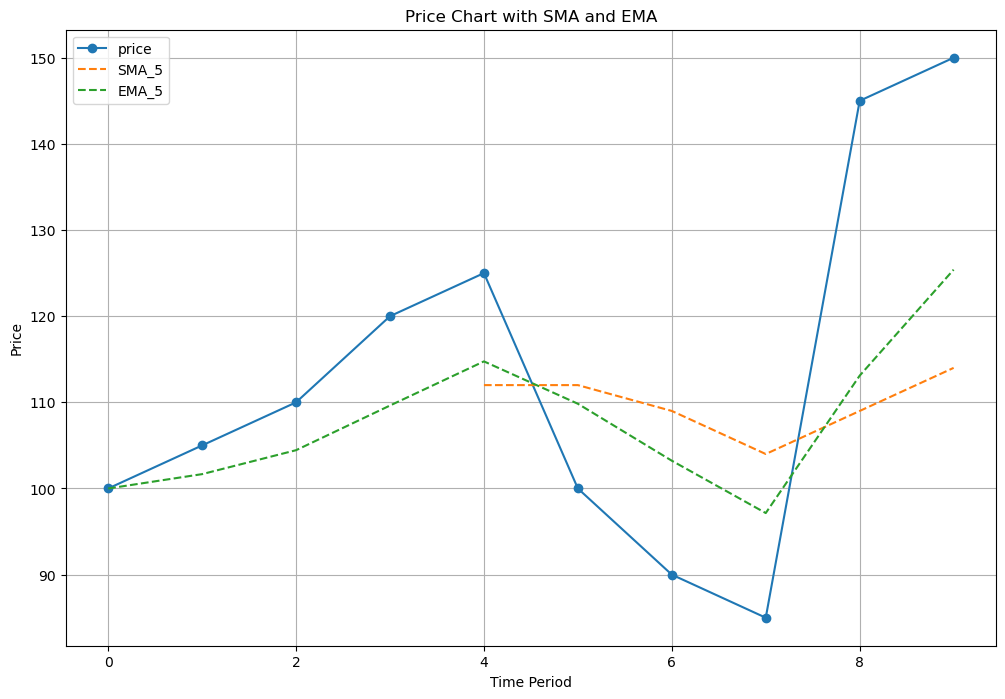

In [5]:
window = 5
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()
# plot the original prices and moving averages
plt.figure(figsize = (12,8))
plt.plot(prices, label='price', marker='o')
plt.plot(sma, label=f'SMA_{window}', linestyle='--')
plt.plot(ema, label=f'EMA_{window}', linestyle='--')
plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [6]:
import yfinance as yf

In [7]:
data = yf.download(tickers='BTC-USD', period='max', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67810.257812   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2024-10-12  63193.023438  16744110886  
2024-10-13  62851.375000  18177529690  
2024-10-14  66046.125000  43706958056  
2024-10-15  67041.109375  48863870879  
2024-10-16  67810.257812  42010509312  

[3683 rows x 6 columns]

In [9]:
import pandas_ta as ta  # we use pandas_ta for technical analysis

In [10]:
data.ta.adx(high='High', low='Low', close='Close', length=14, append=True)
data

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67810.257812   

               Adj Close       Volume     ADX_14     DMP_14     DMN_14  
Date                                                                    
2014-09-17    457.334015     21056800        NaN        NaN        NaN  
2014-09-18    424.440002     34483200        NaN        NaN        NaN  
2014-09-19    394.795990     37919700        NaN        NaN        NaN  
2014-09-20    408.903992     36863600        NaN        NaN        NaN  
2014-09-21    398.821014     26580100        NaN        NaN        NaN  
...                  ...          ...        ...        ...        ...  
2024-10-12  63193.023438  16744110886  13.980498  23.664010  22.489495  
2024-10-13  62851.375000  18177529690  13.041667  22.585270  22.966478  
2024-10-14  66046.125000  43706958056  13.624384  30.442544  19.792799  
2024-10-15  67041.109375  48863870879  14.689185  31.977329  17.780597  
2024-10-16  67810.257812  42010509312  15.813026  31.670593  16.895387  

[3683 rows x 9 columns]

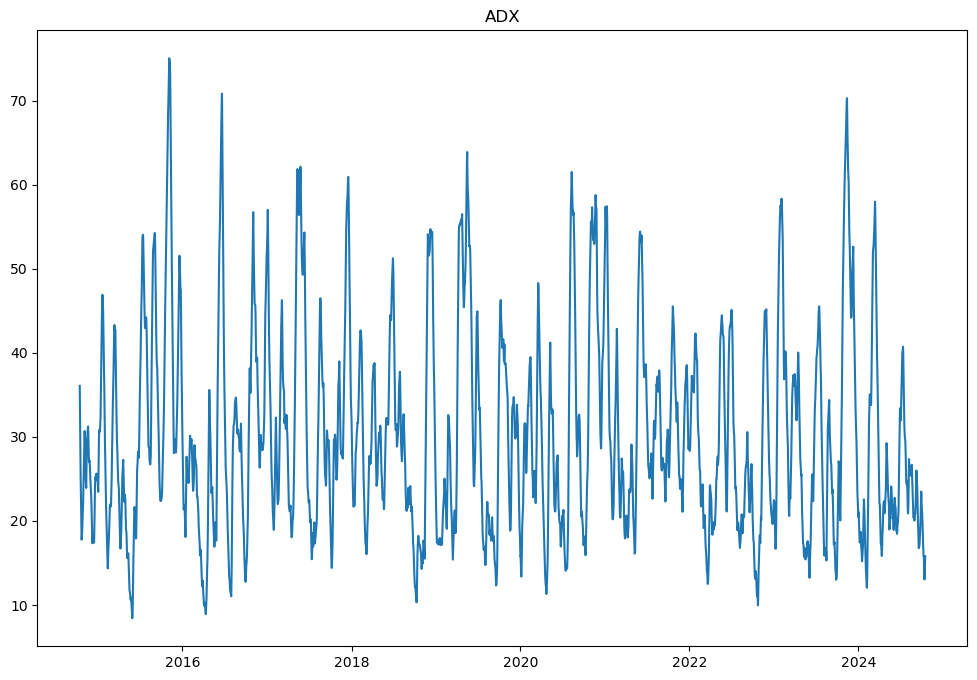

In [12]:
plt.figure(figsize=(12,8))
plt.plot(data['ADX_14'])
plt.title('ADX')
plt.show()

In [15]:
# plotting the candles alongside adx
import plotly.graph_objects as go
dfpl = data.copy()

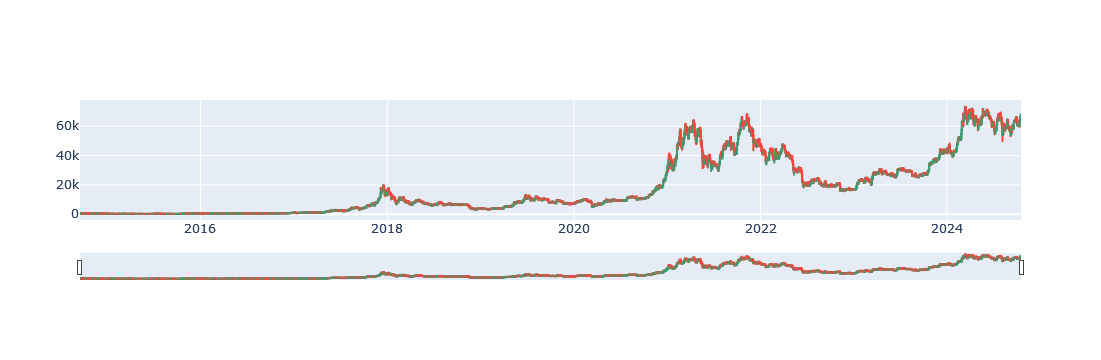

In [19]:
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     low=dfpl['Low'],
                                     high=dfpl['High'],
                                     close=dfpl['Close'])])
fig.show()

# RSi and Stochastick
* point of noting -> Stochastic divergence setups

In [20]:
data = yf.download(tickers='BTC-USD', period='max', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67648.203125   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2024-10-12  63193.023438  16744110886  
2024-10-13  62851.375000  18177529690  
2024-10-14  66046.125000  43706958056  
2024-10-15  67041.109375  48863870879  
2024-10-16  67648.203125  40017149952  

[3683 rows x 6 columns]

In [24]:
data['RSI_10'] = ta.rsi(data.Close, length=10)

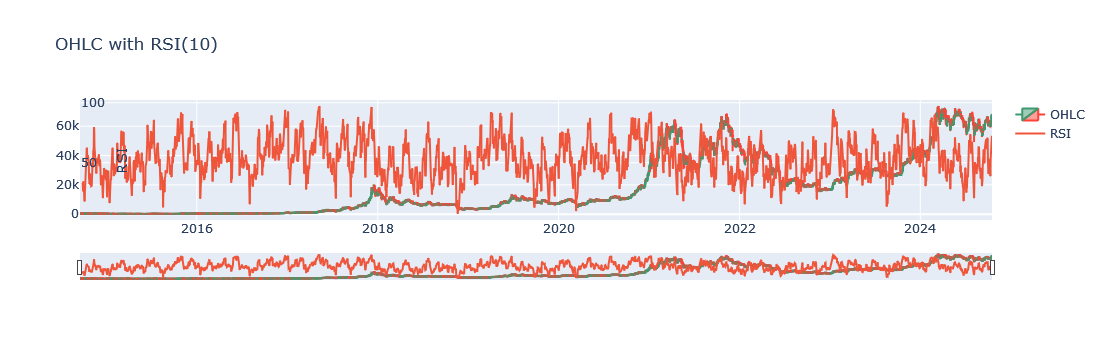

In [27]:
df = data[::]
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='OHLC'),
                      go.Scatter(x=df.index, y=df['RSI_10'], name='RSI', yaxis='y2')])
fig.update_layout(title='OHLC with RSI(10)',
                  yaxis=dict(domain=[0.2, 1]),
                  yaxis2 = dict(domain=[0,0.2],
                                anchor='free',
                                overlaying='y',
                                side = 'right',
                                title='RSI'))
fig.show()

## stochastic

In [30]:
df.loc[:,:].ta.stoch(high='High', low='Low', close='Close',fast_k=14, slow_d=3, append=True)

STOCHk_14_3_3  STOCHd_14_3_3
Date                                    
2014-09-30            NaN            NaN
2014-10-01            NaN            NaN
2014-10-02      10.951746            NaN
2014-10-03       6.500989            NaN
2014-10-04       2.878933       6.777223
...                   ...            ...
2024-10-12      42.106793      29.594664
2024-10-13      55.611749      41.135764
2024-10-14      70.951325      56.223289
2024-10-15      81.197719      69.253598
2024-10-16      92.783133      81.644059

[3670 rows x 2 columns]

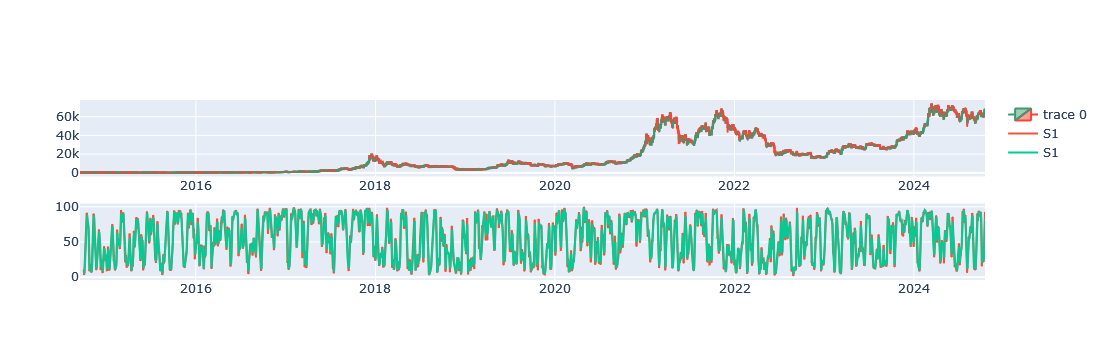

In [32]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']),row=1, col=1)
# in the second row, add the ADX trace...
fig.add_trace(go.Scatter(x=df.index,y=df['STOCHk_14_3_3'],name='S1'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['STOCHd_14_3_3'],name='S1'), row=2, col=1)
fig.update_layout(
    xaxis=dict(rangeslider=dict(visible=False)),
    xaxis2=dict(rangeslider=dict(visible=False))
)
fig.show()

## Bollinger Bands

In [33]:
data

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67648.203125   

               Adj Close       Volume     RIS_10     RSI_10  
Date                                                         
2014-09-17    457.334015     21056800        NaN        NaN  
2014-09-18    424.440002     34483200        NaN        NaN  
2014-09-19    394.795990     37919700        NaN        NaN  
2014-09-20    408.903992     36863600        NaN        NaN  
2014-09-21    398.821014     26580100        NaN        NaN  
...                  ...          ...        ...        ...  
2024-10-12  63193.023438  16744110886  56.702536  56.702536  
2024-10-13  62851.375000  18177529690  54.443785  54.443785  
2024-10-14  66046.125000  43706958056  67.779432  67.779432  
2024-10-15  67041.109375  48863870879  70.743113  70.743113  
2024-10-16  67648.203125  40017149952  72.460438  72.460438  

[3683 rows x 8 columns]

In [34]:
data = pd.concat([data, ta.bbands(data.Close, length=14)], axis=1)
data

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67648.203125   

               Adj Close       Volume     RIS_10     RSI_10    BBL_14_2.0  \
Date                                                                        
2014-09-17    457.334015     21056800        NaN        NaN           NaN   
2014-09-18    424.440002     34483200        NaN        NaN           NaN   
2014-09-19    394.795990     37919700        NaN        NaN           NaN   
2014-09-20    408.903992     36863600        NaN        NaN           NaN   
2014-09-21    398.821014     26580100        NaN        NaN           NaN   
...                  ...          ...        ...        ...           ...   
2024-10-12  63193.023438  16744110886  56.702536  56.702536  59294.652407   
2024-10-13  62851.375000  18177529690  54.443785  54.443785  59846.582198   
2024-10-14  66046.125000  43706958056  67.779432  67.779432  59182.800823   
2024-10-15  67041.109375  48863870879  70.743113  70.743113  58747.287207   
2024-10-16  67648.203125  40017149952  72.460438  72.460438  58575.082281   

              BBM_14_2.0    BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  
Date                                                            
2014-09-17           NaN           NaN         NaN         NaN  
2014-09-18           NaN           NaN         NaN         NaN  
2014-09-19           NaN           NaN         NaN         NaN  
2014-09-20           NaN           NaN         NaN         NaN  
2014-09-21           NaN           NaN         NaN         NaN  
...                  ...           ...         ...         ...  
2024-10-12  62073.837333  64853.022258    8.954449    0.701351  
2024-10-13  61874.985212  63903.388226    6.556456    0.740679  
2024-10-14  62069.029855  64955.258887    9.300062    1.188978  
2024-10-15  62512.179967  66277.072726   12.045309    1.101469  
2024-10-16  63013.281250  67451.480219   14.086551    1.022162  

[3683 rows x 13 columns]

In [35]:
data.columns = data.columns[:8].tolist() + ['BB_LOWER', 'BB_MIDDLE', 'BB_UPPER'] + data.columns[11:].tolist()
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RIS_10',
       'RSI_10', 'BB_LOWER', 'BB_MIDDLE', 'BB_UPPER', 'BBB_14_2.0',
       'BBP_14_2.0'],
      dtype='object')

In [36]:
data

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  68261.265625  66790.921875  67648.203125   

               Adj Close       Volume     RIS_10     RSI_10      BB_LOWER  \
Date                                                                        
2014-09-17    457.334015     21056800        NaN        NaN           NaN   
2014-09-18    424.440002     34483200        NaN        NaN           NaN   
2014-09-19    394.795990     37919700        NaN        NaN           NaN   
2014-09-20    408.903992     36863600        NaN        NaN           NaN   
2014-09-21    398.821014     26580100        NaN        NaN           NaN   
...                  ...          ...        ...        ...           ...   
2024-10-12  63193.023438  16744110886  56.702536  56.702536  59294.652407   
2024-10-13  62851.375000  18177529690  54.443785  54.443785  59846.582198   
2024-10-14  66046.125000  43706958056  67.779432  67.779432  59182.800823   
2024-10-15  67041.109375  48863870879  70.743113  70.743113  58747.287207   
2024-10-16  67648.203125  40017149952  72.460438  72.460438  58575.082281   

               BB_MIDDLE      BB_UPPER  BBB_14_2.0  BBP_14_2.0  
Date                                                            
2014-09-17           NaN           NaN         NaN         NaN  
2014-09-18           NaN           NaN         NaN         NaN  
2014-09-19           NaN           NaN         NaN         NaN  
2014-09-20           NaN           NaN         NaN         NaN  
2014-09-21           NaN           NaN         NaN         NaN  
...                  ...           ...         ...         ...  
2024-10-12  62073.837333  64853.022258    8.954449    0.701351  
2024-10-13  61874.985212  63903.388226    6.556456    0.740679  
2024-10-14  62069.029855  64955.258887    9.300062    1.188978  
2024-10-15  62512.179967  66277.072726   12.045309    1.101469  
2024-10-16  63013.281250  67451.480219   14.086551    1.022162  

[3683 rows x 13 columns]

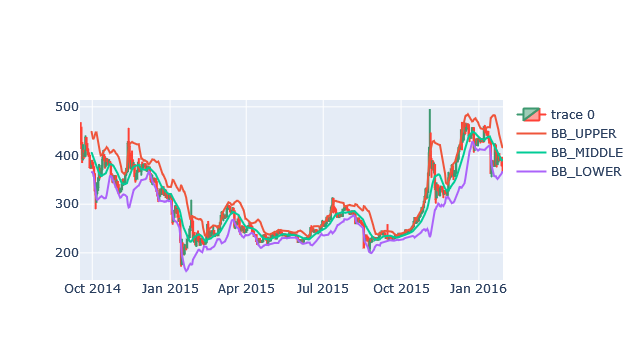

In [37]:
df = data[:500]
fig = go.Figure()
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']))
fig.add_trace(go.Scatter(x=df.index, y=df['BB_UPPER'], name='BB_UPPER'))
fig.add_trace(go.Scatter(x=df.index, y=df['BB_MIDDLE'], name='BB_MIDDLE'))
fig.add_trace(go.Scatter(x=df.index, y=df['BB_LOWER'], name='BB_LOWER'))
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))
fig.show()

## ATR

In [38]:
data['ATR'] = ta.atr(data.High, data.Low, data.Close, length=14)
df = data[:500]

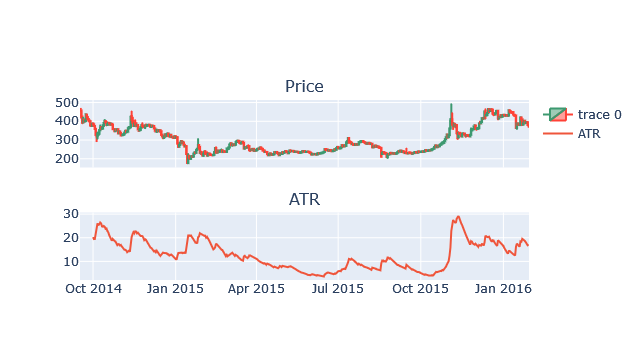

In [40]:
fig = make_subplots(rows=2, cols=1, subplot_titles=['Price','ATR'],shared_xaxes=True)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['ATR'], name='ATR'), row=2, col=1)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))
fig.show()

## Volume Indicators
__ON BALANCE VOLUME__
* If today's closing price > previous day's closing price OBV=OBV on previous day + today's trading volume
* If today's closing price = previous day's closing price OBV = OBV on previous day + 0
* If today's closing price < previous day's closing price OBV = OBV on previous - today's trading volume
* OBV can be used for divergence of signals.
* Volume preceding price Movements -> Teh theory behind obv is that changes in voluem preced price movements. An increase in volume often precedes a change in price direction.

__CHAIKIN MONEY FLOW__(CMF <br>
CMF values above zero indicate buying pressure, suggesting a potential bullish trend. CMF values below zero suggest selling pressure, indicating a potential bearish trend. <br>
__Trend Confirmation__:
Rising CMF during an uptrend confirms the strength of the upward price movement. Falling CMF during a downtrend confirms the strength of the downward price movement. <br>
__Divergence Signals:__ 
Divergence between price and CMf can signal potential reversals.Fore example, if prices are rising but CMF is falling, it may indicate weakening buing interest and suggest a possible trend reversal.


# OBV

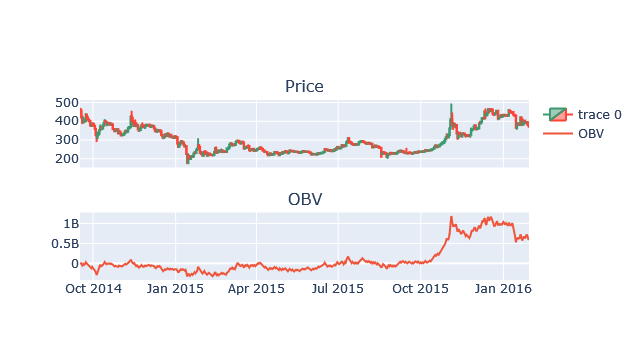

In [42]:
data['OBV'] = ta.obv(data.Close, data.Volume)
df = data[:500]
fig = make_subplots(rows=2, cols=1, subplot_titles=['Price', 'OBV'], shared_xaxes=True)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['OBV'], name='OBV'), row=2, col=1)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))
fig.show()

# CMF

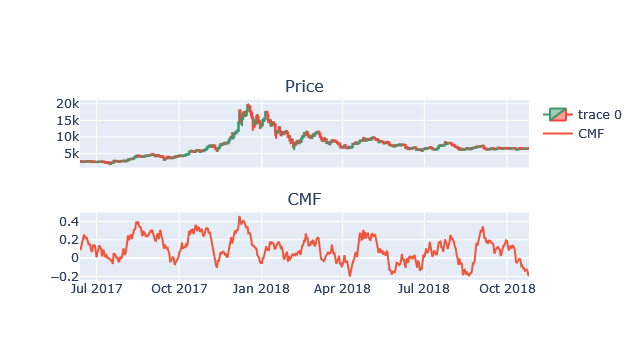

In [43]:
data['CMF'] = ta.cmf(data.High, data.Low, data.Close, data.Volume, length=20)
df = data[1000:1500]
fig = make_subplots(rows=2, cols=1, subplot_titles=['Price', 'CMF'], shared_xaxes=True)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['CMF'], name='CMF'), row=2, col=1)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))
fig.show()